In [1]:
import sys  
import os
path = os.getcwd()
if path.endswith('Notebooks'):
    path = path[:-9]
path = path + str("Source")
sys.path.insert(0, path)
pathData = path + str("\\Data")

import pandas as pd
import numpy as np
import DataLoading
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

# header = {"mainGrid", "otherGrids", "hourOfDay"}
# three year power supply records from 1995 to 1998
def dataPreprocesssing():
    df = pd.read_csv(pathData + str('\\powerSupplyStream.csv'))

    # create timestamps
    start = datetime.datetime(1995, 1, 1, 0)
    timestamp_list = [start + datetime.timedelta(hours=x) for x in range(len(df))]
    df['timestamps'] = timestamp_list

    # mistake in hours numbering hour 6 = 1248 instances
    #                                 9 = 1246 instances
    #wrongHoursIndex = [24969]
    #for i in np.arange(len(df)-1):
    #    if df['hourOfDay'][i]+1 != df['hourOfDay'][i + 1] and df['hourOfDay'][i] != 23:
    #        print("wtf")
   # df.at[wrongHoursIndex, 'hourOfDay'] = 9

    df_train, df_test = train_test_split(df, test_size=3528, shuffle=False)
    # hourly change in consumption
    diffMain = np.append(np.array(df_train['mainGrid']), 0) - np.append(0,np.array(df_train['mainGrid']))
    diffMain = diffMain[0:-1]
    diffMain[0] = 0
    diffOthers = np.append(np.array(df_train['otherGrids']), 0) - np.append(0,np.array(df_train['otherGrids']))
    diffOthers = diffOthers[0:-1]
    diffOthers[0] = 0

    df_train['diffMain'] = diffMain
    df_train['diffOthers'] = diffOthers

    df_hourDiffMain = pd.DataFrame()
    df_hourDiffOther = pd.DataFrame()
#     for hour in np.arange(24):
#         hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffMain'].values
#         df_hourDiffMain[str(hour)] = hourDiffList
#         hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffOthers'].values
#         df_hourDiffOther[str(hour)] = hourDiffList

    # figure(figsize=(22, 5), dpi=80, linewidth=5)
    # plt.title("Main Grid boxplt change of every hour through time")
    # df_hourDiffMain.boxplot()
    # figure(figsize=(22, 5), dpi=80, linewidth=5)
    # plt.title("Other Grids boxplt change of every hour through time")
    # df_hourDiffOther.boxplot()
    # plt.show()
    #
    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # ax1.boxplot(diffMain)
    # ax1.set_title("main Grid")
    # ax2.boxplot(diffOthers)
    # ax2.set_title("other Grids")
    # plt.show()
    #
    # figure(figsize=(90, 16), dpi=80)
    # plt.plot(df_train['timestamps'], df_train['mainGrid'], 'r-')
    # #plt.plot(df_train['timestamps'], df_train['otherGrids'], 'b-')
    # plt.title('Power constumption')
    # plt.xlabel('time', fontsize=14)
    # plt.ylabel('consumption', fontsize=14)
    # plt.show()
    #
    # figure(figsize=(80, 5), dpi=80, linewidth=1)
    # plt.plot(df_train['timestamps'], df_train['diffMain'], 'r-')
    # #plt.plot(df_train['timestamps'], df_train['diffOthers'], 'b-')
    # plt.title('Power constumption diff')
    # plt.xlabel('time', fontsize=14)
    # plt.ylabel('consumption', fontsize=14)
    # plt.show()

    return df_train, df_test


#Model1 with scaling of 0,1
#Model2 data processing output function

In [2]:
train, test =dataPreprocesssing()
train = train['mainGrid']
test = test['mainGrid']

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

trainT, testT = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3 # this means that in LSTM there will be 3 inputs and then 1 output
trainX, trainY = create_dataset(trainT, look_back)
testX, testY = create_dataset(testT, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
early_stopping = EarlyStopping(monitor='loss', patience=100, verbose=0, mode='min')
save_best = ModelCheckpoint("model_2", save_best_only=True, monitor='loss', mode='min')

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=True, callbacks = [early_stopping,save_best])
#There is almost no difference between 100 epochs and 50


NameError: name 'dataset' is not defined

In [ ]:
look_back = 3 # this means that in LSTM there will be 3 inputs and then 1 output
trainX, trainY = create_dataset(trainT, look_back)
testX, testY = create_dataset(testT, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

309/309 [==============================] - 1s 2ms/step
Train Score: 0.06 RMSE
Test Score: 0.05 RMSE


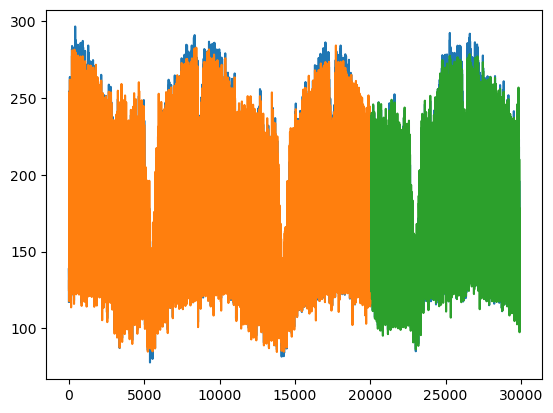

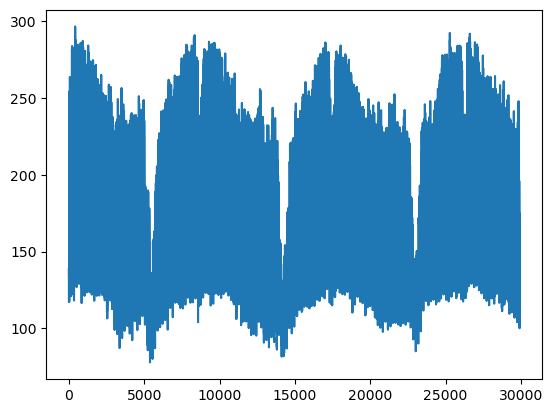

In [84]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# # calculate root mean squared error
# trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
plt.plot(scaler.inverse_transform(dataset))
plt.show()


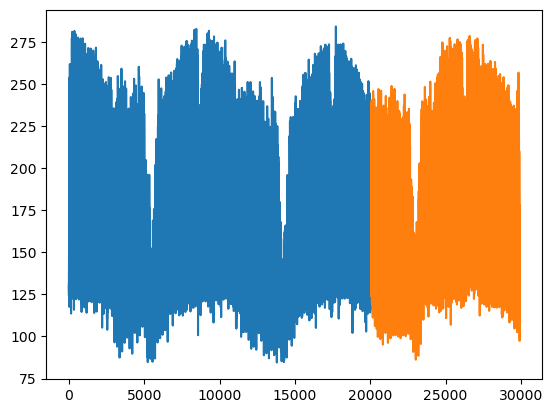

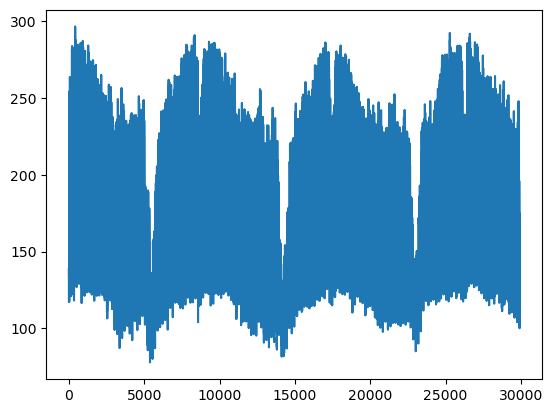

In [71]:
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
plt.plot(scaler.inverse_transform(dataset))
